Les techniques pour entraîner un modèle, l'optimiser, l'évaluer avec la bonne méthodologie.

- Train_test_splt : on va apprendre comment créer un train_set et test_set
- Cross Validation : on verra comment valider un modèle
- GridSearchCV : pour améliorer un modèle
- Learning Curve

**En Machine Learning, il ne faut jamais évaluer la performance d'un modèle sur les mêmes données qui ont servi à son entrainement!**

En Machine Learning, il faut toujours diviser le Dataset en 2 parties :
    
    - Trainset : dont les données sont utilisées pour entraîner le modèle. On y met 80% de données
    - Testset : dont les données sont utilisées pour tester le modèle. On y met 20% de données
 
Dans la partie *Trainset* pour entrainer le modèle, on aura des données (Xtrain, Ytrain) => model.fit(Xtrain, Ytest)

Dans la partie *Testset* pour évaluer ou tester le modèle, on aura des données (Xtest, Ytest) => model.score(Xtest, Ytest)

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

(150, 4)


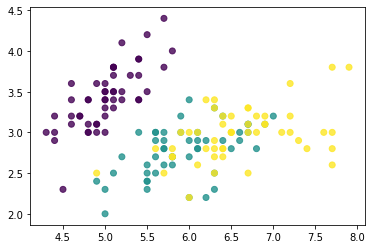

In [2]:
iris = load_iris()

X = iris.data
y = iris.target

print(X.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

In [3]:
#Pour diviser notre Dataset, on importe la fonction "train_test_split"

from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5) #Test_size permet de définir
# le pourcentage de données X_test, y_test
# Pour contrôler l'aléatoire, on peut utiliser l'argument "random_state" pour fixer 

print('Train set :', X_train.shape)
print('Test set :', X_test.shape)

Train set : (120, 4)
Test set : (30, 4)


Text(0.5, 1.0, 'Test set')

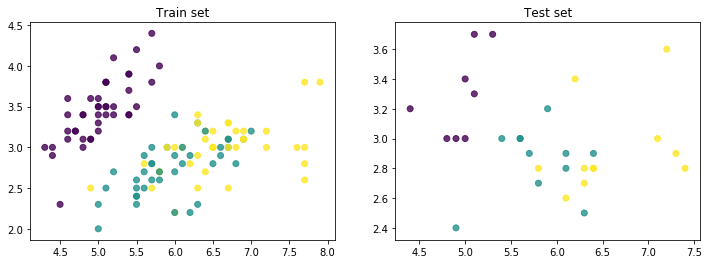

In [5]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:, 1], c=y_test, alpha=0.8)
plt.title('Test set')

In [6]:
model = KNeighborsClassifier(n_neighbors=1) #on fixe le nombre des voisins à 1 pour le moment

model.fit(X_train, y_train)
print('Train score', model.score(X_train, y_train)) #on obtient un score de 100%

#Pour avoir une idée de la performance future de notre modèle, il faut le tester sur les données du Test_set
print('Test score', model.score(X_test, y_test)) #On obtient un score de 90%

Train score 1.0
Test score 0.9


## Validation Set

## Améliorer le modèle

Pour améliorer son modèle, il faut régler les hyperparamètres du modèle. On peut par exemple modifier le nombre des voisins.

Pour évaluer un modèle, il faut le soumettre à des données qu'il n'a jamais vu. Or si on règle notre modèle sur les données du Dataset Test, alors il aura indirectement vu ces données puisqu'il est reglé dessus.
Pour cette raison, on découpe une 3 ème section dans notre Dataset et on l'appelle le **Validation Set**. Cette section nous permet de chercher les réglages du modèle qui donnent les meilleures performances tout en gardant de côté les données du Test_set pour évaluer la machine sur des données qu'elle n'aura jamais vu.

## La Cross-Validation

La Cross-Validation consiste à entraîner puis valider notre modèle sur plusieurs découpes possibles du **Train_set**

In [7]:
from sklearn.model_selection import cross_val_score

In [8]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy').mean() #On spécifie le nombre de 
#Split/découpage avec l'argument cv=5, l'argument scoring correspond au "metric"

0.9745757575757577

In [9]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

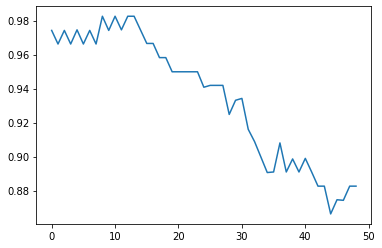

In [10]:
plt.plot(val_score) #Ce graphique nous montre que nous atteindrons les meilleurs performances dans notre modèle lorsque
# le nombre des voisins sera aux alentours de 10

## La Validation Curve

La fonction "Validation Curve" nous évite à écrire cette boucle *for* car on peut directement créer ce graphique.

In [11]:
from sklearn.model_selection import validation_curve

In [12]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, X_train, y_train, 'n_neighbors', k, cv=5)

val_score.shape
val_score.mean(axis=1)

array([0.97424242, 0.96624242, 0.97424242, 0.96624242, 0.97457576,
       0.96624242, 0.97424242, 0.96624242, 0.98257576, 0.97424242,
       0.98257576, 0.97457576, 0.98257576, 0.98257576, 0.97457576,
       0.96657576, 0.96657576, 0.95824242, 0.95824242, 0.94990909,
       0.94990909, 0.94990909, 0.94990909, 0.94990909, 0.94081818,
       0.94190909, 0.94190909, 0.94190909, 0.92481818, 0.93315152,
       0.93424242, 0.91606061, 0.90881818, 0.89972727, 0.89063636,
       0.8909697 , 0.90806061, 0.8909697 , 0.89863636, 0.8909697 ,
       0.8989697 , 0.8909697 , 0.88263636, 0.88263636, 0.86630303,
       0.87463636, 0.87430303, 0.88263636, 0.88263636])

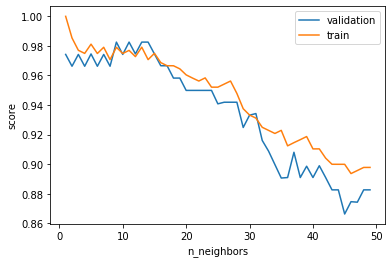

In [13]:
plt.plot(k, val_score.mean(axis=1), label ='validation')
plt.plot(k, train_score.mean(axis=1), label ='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

#Le modèle commence à "Overfit". Les erreurs sur le **Train** diminuent, mais celles sur le **Test** augmentent.
## **Overfitting : le modèlle s'est trop perfectionné sur le "Trainset" et a perdu tout sens de généralisation.

# => Bon score : train_score
# => Mauvais score : test_score 

# Dans l'algorithme de KNN, on a souvent des problèmes "Overfitting" lorsqu'on choisit un nombre de voisins égal à 1.

# GridSearchCV

Il nous permet de trouver le modèle avec les meilleurs **hyperparamètres**

In [14]:
from sklearn.model_selection import GridSearchCV #GridSearchCV utilise la Cross_Validation

In [15]:
param_grid = {'n_neighbors' : np.arange(1, 20), 'metric' : ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train,y_train)

C:\Users\Benie\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [16]:
grid.best_score_ #on peut voir le modèle qui a obtenu le meilleur score

0.9833333333333333

In [17]:
grid.best_params_ #on peut également voir les meilleurs paramètres de ce modèle

#Ici le meilleur modèle utilise la distance "euclidienne" avec un k plus proche voisins égal à 9

{'metric': 'euclidean', 'n_neighbors': 9}

In [18]:
model = grid.best_estimator_

In [19]:
model.score(X_test, y_test)

0.9666666666666667

In [20]:
#On peut utiliser la fonction "confusion_matrix" pour évaluer la performance de notre modèle.
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix(y_test, model.predict(X_test))

#On voit que les 8 fleurs de la classe 1 ont bien été rangées dans cette classe
#Pour les 11 fleurs de la classe 2, 10 ont été classés dans la classe 2 et 1 dans la classe 3
#les 11 fleurs de la classe 3 ont bien été rangées dans cette classe

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 11]], dtype=int64)

# Learning_curve : Courbe d'apprentissage

Ces courbes montrent l'évolution de la performance du modèle en focntion de la quantité des données qu'on lui a fourni.

Plus la machine dispose des données pour s'entraîner, meilleure sera sa performance.

In [22]:
from sklearn.model_selection import learning_curve #courbe ROC

[ 9 19 28 38 47 57 66 76 85 95]


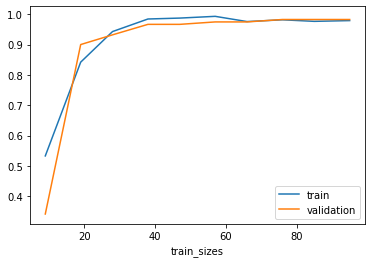

In [23]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')

plt.xlabel('train_sizes')
plt.legend()

On voit sur ce graphique qu'en utilisant 10 lots (train_sizes), la performance n'évolue plus à partir du moment où on a plus de 60 points dans notre Dataset. Notre modèle va continuer à stagner et nous n'aurons plus de fortes performances en ayant 100 points.

## Exercice avec la base des données de Titanic

In [31]:
titanic = sns.load_dataset('titanic')
titanic.shape
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [32]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']] #on crée un mini dataset ne contenant que les variables à utiliser pour
#cette estimation
titanic.dropna(axis = 0, inplace = True) #on enlève les données manquantes de notre base des données
titanic['sex'].replace(['male', 'female'], [0, 1], inplace = True) #on a remplacé 'male' et 'female' par 0 et 1
titanic.head() #Pour faire du Machine Learning, il nous faut des valeurs numériques soit des variables quantitatives

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [37]:
y_titanic = titanic['survived']
X_titanic = titanic.drop('survived', axis = 1) #axis = 1 pour la colonne 1

print(y_titanic.shape)
#print(X_titanic)
print(X_titanic.shape)

(714,)
(714, 3)


In [39]:
X_tit_train, X_tit_test, y_tit_train, y_tit_test = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state = 5)

print('Train set :', X_tit_train.shape)
print('Test set :', X_tit_test.shape)

Train set : (571, 3)
Test set : (143, 3)


## La cross validation

In [40]:
cross_val_score(KNeighborsClassifier(), X_tit_train, y_tit_train, cv=5, scoring='accuracy').mean()

0.7478871090770405

In [41]:
val_tit_score = []
for k in range(1, 50):
    score_tit = cross_val_score(KNeighborsClassifier(k), X_tit_train, y_tit_train, cv=5).mean()
    val_tit_score.append(score_tit)

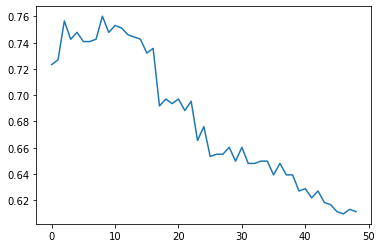

In [42]:
plt.plot(val_tit_score) #Ce graphique nous montre que nous atteindrons les meilleurs performances dans notre modèle lorsque
# le nombre des voisins sera aux alentours de 10

## La validation curve

In [43]:
model_tit = KNeighborsClassifier()
k = np.arange(1, 50)

train_tit_score, val_tit_score = validation_curve(model, X_tit_train, y_tit_train, 'n_neighbors', k, cv=5)

val_tit_score.shape
val_tit_score.mean(axis=1)

array([0.72327994, 0.7268955 , 0.75659802, 0.74257818, 0.74788711,
       0.74083905, 0.74085431, 0.7426087 , 0.7601373 , 0.74782609,
       0.7531045 , 0.75128909, 0.74610221, 0.74433257, 0.74265446,
       0.73212815, 0.73562166, 0.69180778, 0.69708619, 0.69354691,
       0.69708619, 0.68829901, 0.69533181, 0.66547674, 0.67606407,
       0.65327231, 0.65501144, 0.65501144, 0.6602746 , 0.64971777,
       0.66025934, 0.64802441, 0.6479939 , 0.64976354, 0.64977879,
       0.63926773, 0.64805492, 0.63926773, 0.63929825, 0.62698703,
       0.62878719, 0.62173913, 0.62701754, 0.61827613, 0.61653699,
       0.61127384, 0.60953471, 0.61301297, 0.61127384])

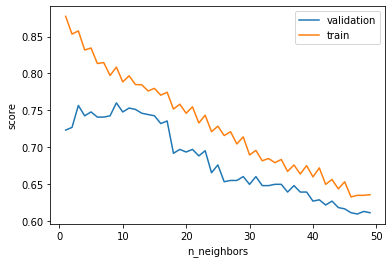

In [44]:
plt.plot(k, val_tit_score.mean(axis=1), label ='validation')
plt.plot(k, train_tit_score.mean(axis=1), label ='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

## GridSearchCV

In [45]:
param_tit_grid = {'n_neighbors' : np.arange(1, 20), 'metric' : ['euclidean', 'manhattan']}

grid_tit = GridSearchCV(KNeighborsClassifier(), param_tit_grid, cv=5)

grid_tit.fit(X_tit_train,y_tit_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [46]:
grid_tit.best_score_

0.7775831873905429

In [47]:
grid_tit.best_params_

{'metric': 'manhattan', 'n_neighbors': 11}

In [48]:
model_tit = grid_tit.best_estimator_

In [49]:
model_tit.score(X_tit_test, y_tit_test)

0.7132867132867133

In [51]:
confusion_matrix(y_tit_test, model_tit.predict(X_tit_test))

array([[72, 16],
       [25, 30]], dtype=int64)

# Learning_curve : Courbe d'apprentissage

[ 45  91 136 182 228 273 319 364 410 456]


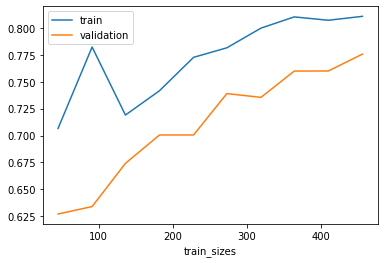

In [52]:
N_tit, train_tit_score, val_tit_score = learning_curve(model_tit, X_tit_train, y_tit_train, train_sizes = np.linspace(0.1, 1.0, 10), cv=5)

print(N_tit)
plt.plot(N_tit, train_tit_score.mean(axis=1), label='train')
plt.plot(N_tit,val_tit_score.mean(axis=1),label='validation')

plt.xlabel('train_sizes')
plt.legend()